In [3]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np

# Step 2: Load the datasets (since they're .txt files)
df_demo = pd.read_csv('df_final_demo.txt', sep=',')  # Client Profiles
df_web_pt1 = pd.read_csv('df_final_web_data_pt_1.txt', sep=',')  # Digital Footprints Part 1
df_web_pt2 = pd.read_csv('df_final_web_data_pt_2.txt', sep=',')  # Digital Footprints Part 2
df_experiment = pd.read_csv('df_final_experiment_clients.txt', sep=',')  # Experiment Roster

# Step 3: Combine pt1 and pt2 into a single web data dataframe
df_web = pd.concat([df_web_pt1, df_web_pt2], ignore_index=True)

In [5]:
# Preview the first few rows of each dataframe
print("===== df_demo =====")
display(df_demo.head())
print("===== df_web =====")
display(df_web.head())
print("===== df_experiment =====")
display(df_experiment.head())

# Check the shape of each dataframe
print("Shapes:")
print(f"df_demo: {df_demo.shape}")
print(f"df_web: {df_web.shape}")
print(f"df_experiment: {df_experiment.shape}")

# Get data types and null values
print("===== Info and Nulls =====")
print("\n--- df_demo ---")
print(df_demo.info())
print(df_demo.isnull().sum())

print("\n--- df_web ---")
print(df_web.info())
print(df_web.isnull().sum())

print("\n--- df_experiment ---")
print(df_experiment.info())
print(df_experiment.isnull().sum())

===== df_demo =====


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


===== df_web =====


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


===== df_experiment =====


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


Shapes:
df_demo: (70609, 9)
df_web: (755405, 5)
df_experiment: (70609, 2)
===== Info and Nulls =====

--- df_demo ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
None
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons

In [7]:
# Convert the 'date_time' column to datetime format
df_web['date_time'] = pd.to_datetime(df_web['date_time'])
# Drop rows with missing values in df_demo
df_demo_clean = df_demo.dropna()

# Drop rows with missing 'Variation' in df_experiment
df_experiment_clean = df_experiment.dropna(subset=['Variation'])
# Drop duplicates in all three datasets if any
df_demo_clean = df_demo_clean.drop_duplicates()
df_web = df_web.drop_duplicates()
df_experiment_clean = df_experiment_clean.drop_duplicates()

In [9]:
# Merge web interaction data with client demographics
web_demo = pd.merge(df_web, df_demo_clean, on='client_id', how='inner')

In [11]:
# Count how many times each client_id appear
client_usage_counts = web_demo['client_id'].value_counts().reset_index()
client_usage_counts.columns = ['client_id', 'interaction_count']

# Merge usage count back into the full merged dataframe
web_demo = pd.merge(web_demo, client_usage_counts, on='client_id', how='left')

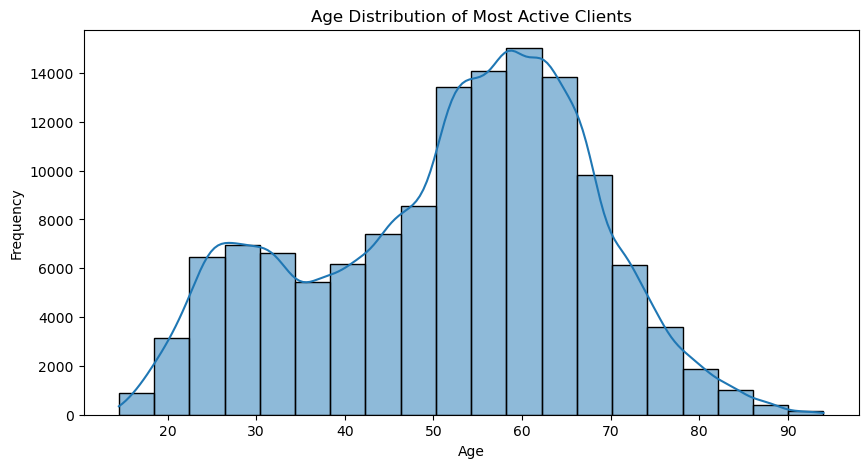

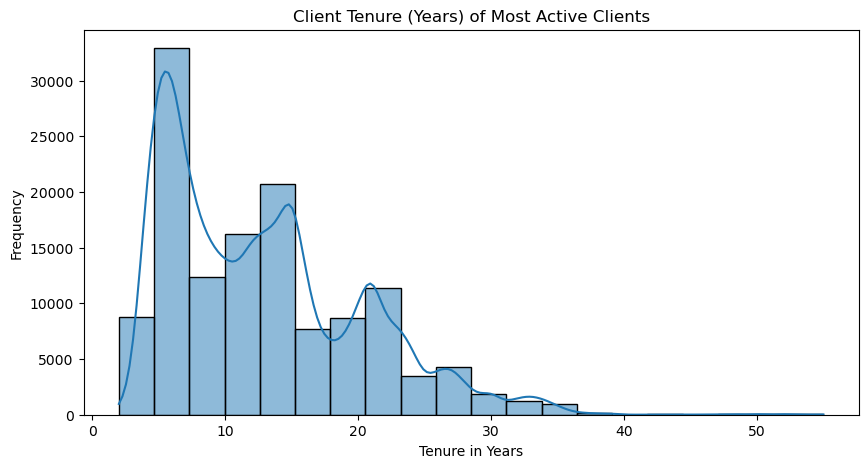

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Focus on the top 25% most active clients
threshold = web_demo['interaction_count'].quantile(0.75)
active_clients = web_demo[web_demo['interaction_count'] >= threshold]

# Plot age distribution
plt.figure(figsize=(10, 5))
sns.histplot(active_clients['clnt_age'], bins=20, kde=True)
plt.title('Age Distribution of Most Active Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot tenure (in years) distribution
plt.figure(figsize=(10, 5))
sns.histplot(active_clients['clnt_tenure_yr'], bins=20, kde=True)
plt.title('Client Tenure (Years) of Most Active Clients')
plt.xlabel('Tenure in Years')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Merge web interaction data with experiment variation info
web_exp = pd.merge(df_web, df_experiment_clean, on='client_id', how='inner')
web_exp.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test


In [19]:
web_exp['process_step'].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [21]:
# Get unique clients who reached final step (assume it's 'step_4' or 'confirm')
completed = web_exp[web_exp['process_step'] == 'confirm'][['client_id', 'Variation']].drop_duplicates()

# Total unique clients per group
total_users = web_exp[['client_id', 'Variation']].drop_duplicates()
total_counts = total_users['Variation'].value_counts()

# Completion counts per group
completion_counts = completed['Variation'].value_counts()

# Calculate completion rate
completion_rate = (completion_counts / total_counts) * 100
print("Completion Rate (%) by Group:")
print(completion_rate)

Completion Rate (%) by Group:
Variation
Test       69.293236
Control    65.587285
Name: count, dtype: float64


In [23]:
# Sort the data by client and timestamp
web_exp_sorted = web_exp.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Calculate time difference from previous step (in seconds)
web_exp_sorted['time_diff'] = web_exp_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

In [25]:
# Drop missing time_diff values (karena langkah pertama selalu NaN)
time_data = web_exp_sorted.dropna(subset=['time_diff'])

# Group by process step and variation (Test/Control), then calculate mean
avg_time_per_step = time_data.groupby(['Variation', 'process_step'])['time_diff'].mean().reset_index()

# Sort result for readability
avg_time_per_step = avg_time_per_step.sort_values(by=['Variation', 'process_step'])

# Show result
print("Average Time Spent on Each Step (in seconds):")
print(avg_time_per_step)

Average Time Spent on Each Step (in seconds):
  Variation process_step   time_diff
0   Control      confirm  129.976828
1   Control        start  174.667588
2   Control       step_1   43.180970
3   Control       step_2   38.838146
4   Control       step_3   94.159651
5      Test      confirm  129.476992
6      Test        start  151.680974
7      Test       step_1   37.804657
8      Test       step_2   48.272585
9      Test       step_3   97.356255


In [27]:
# Create a copy of the sorted interaction data
web_exp_sorted = web_exp.sort_values(by=['client_id', 'visit_id', 'date_time']).copy()

# Assign a numeric order to each process step
step_order = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
web_exp_sorted['step_num'] = web_exp_sorted['process_step'].map(step_order)

# Identify the previous step for each user-session
web_exp_sorted['prev_step_num'] = web_exp_sorted.groupby(['client_id', 'visit_id'])['step_num'].shift(1)

# Mark as error if the user moved back to an earlier step
web_exp_sorted['is_error'] = web_exp_sorted['step_num'] < web_exp_sorted['prev_step_num']

In [29]:
# Identify which sessions (client + visit_id) had at least one error
error_sessions = web_exp_sorted[web_exp_sorted['is_error']].drop_duplicates(subset=['client_id', 'visit_id'])

# Count total unique sessions per group
total_sessions = web_exp_sorted.drop_duplicates(subset=['client_id', 'visit_id'])[['client_id', 'visit_id', 'Variation']]
total_sessions_count = total_sessions['Variation'].value_counts()

# Count error sessions per group
error_sessions_count = error_sessions['Variation'].value_counts()

# Calculate error rate per group
error_rate = (error_sessions_count / total_sessions_count) * 100
print("Error Rate (%) by Group:")
print(error_rate)

Error Rate (%) by Group:
Variation
Test       26.795506
Control    20.227646
Name: count, dtype: float64
